In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing



In [2]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [4]:
df = pd.read_csv('/content/Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
df.shape

(600, 6)

In [8]:
df[df.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [9]:
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

print(df)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   

In [10]:
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)
df.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


In [11]:
df.corr()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
Taxable.Income,1.000000,-0.064387,-0.001818,-0.049232,-0.100611,0.037910,0.070628,0.688725
City.Population,-0.064387,1.000000,0.013135,0.079579,-0.007035,0.002087,-0.040098,-0.012225
Work.Experience,-0.001818,0.013135,1.000000,-0.005362,0.033347,-0.018123,-0.094559,0.001972
Undergrad_YES,-0.049232,0.079579,-0.005362,1.000000,0.015120,0.028883,-0.000267,-0.012523
Marital.Status_Married,-0.100611,-0.007035,0.033347,0.015120,1.000000,-0.520317,0.016771,-0.043178
Marital.Status_Single,0.037910,0.002087,-0.018123,0.028883,-0.520317,1.000000,0.047014,0.015820
Urban_YES,0.070628,-0.040098,-0.094559,-0.000267,0.016771,0.047014,1.000000,-0.004830
TaxInc_Good,0.688725,-0.012225,0.001972,-0.012523,-0.043178,0.015820,-0.004830,1.000000


<Axes: >

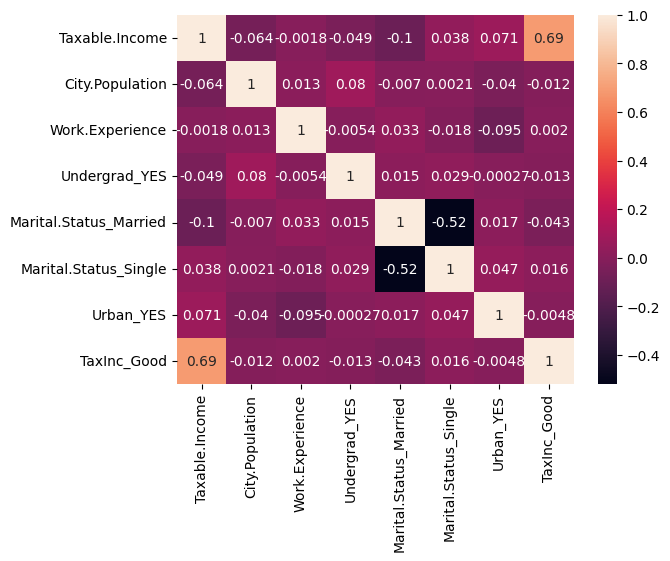

In [12]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

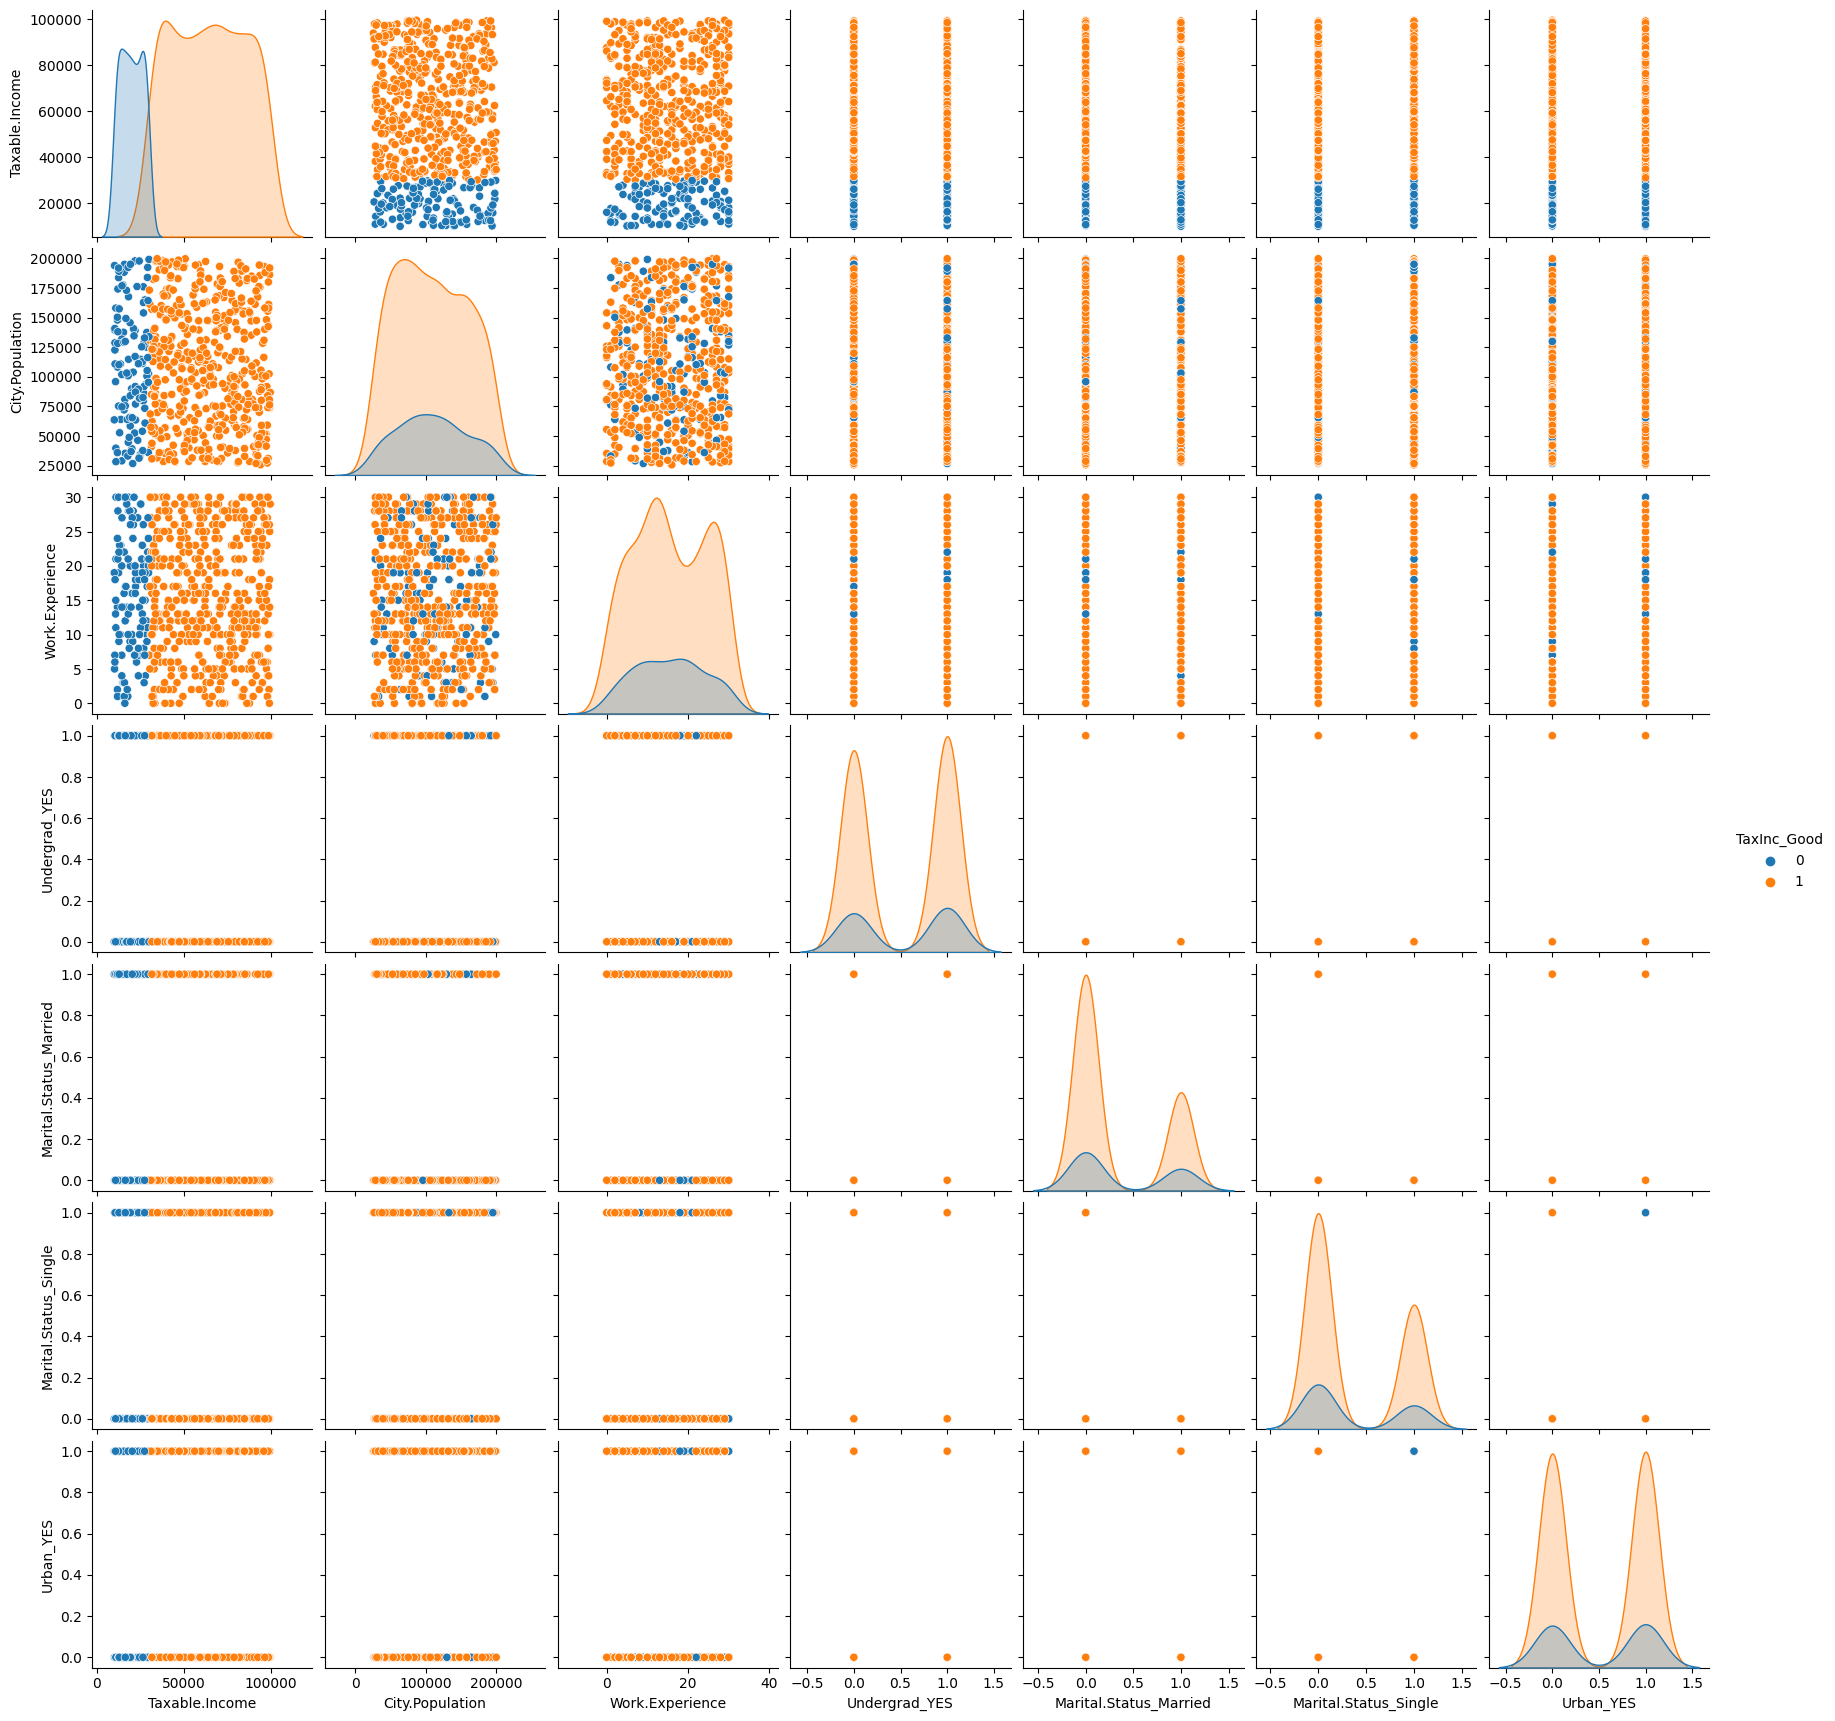

In [13]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df, hue = 'TaxInc_Good')

In [14]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [15]:
X =df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [18]:
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [19]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
df

,population,experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,1
596,55369,2,1,0,0,1,1
597,154058,0,0,0,0,1,1
598,180083,17,1,1,0,0,1


In [20]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

features = df.iloc[:,0:5]
labels = df.iloc[:,5]

colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [22]:
from sklearn.ensemble import RandomForestClassifier as RF

In [23]:
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [24]:
model.estimators_
model.classes_

model.n_classes_

model.n_outputs_

model.oob_score_

prediction = model.predict(x_train)

In [25]:
import numpy as np
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

np.mean(prediction == y_train)

0.9854166666666667

In [26]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

pred_test = model.predict(x_test)

acc_test =accuracy_score(y_test,pred_test)

In [27]:
!pip install pydotplus

In [28]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
tree = model.estimators_[5]

In [29]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)

In [30]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [31]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

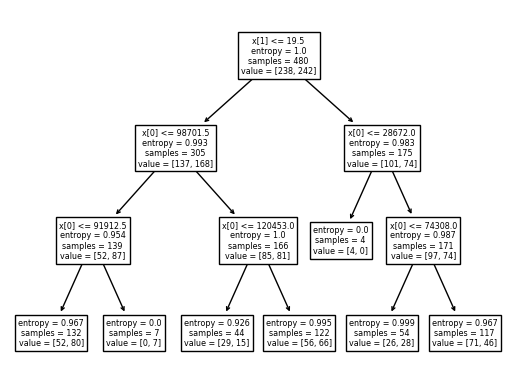

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(model);
colnames = list(df.columns)
colnames

1    80
0    40
dtype: int64

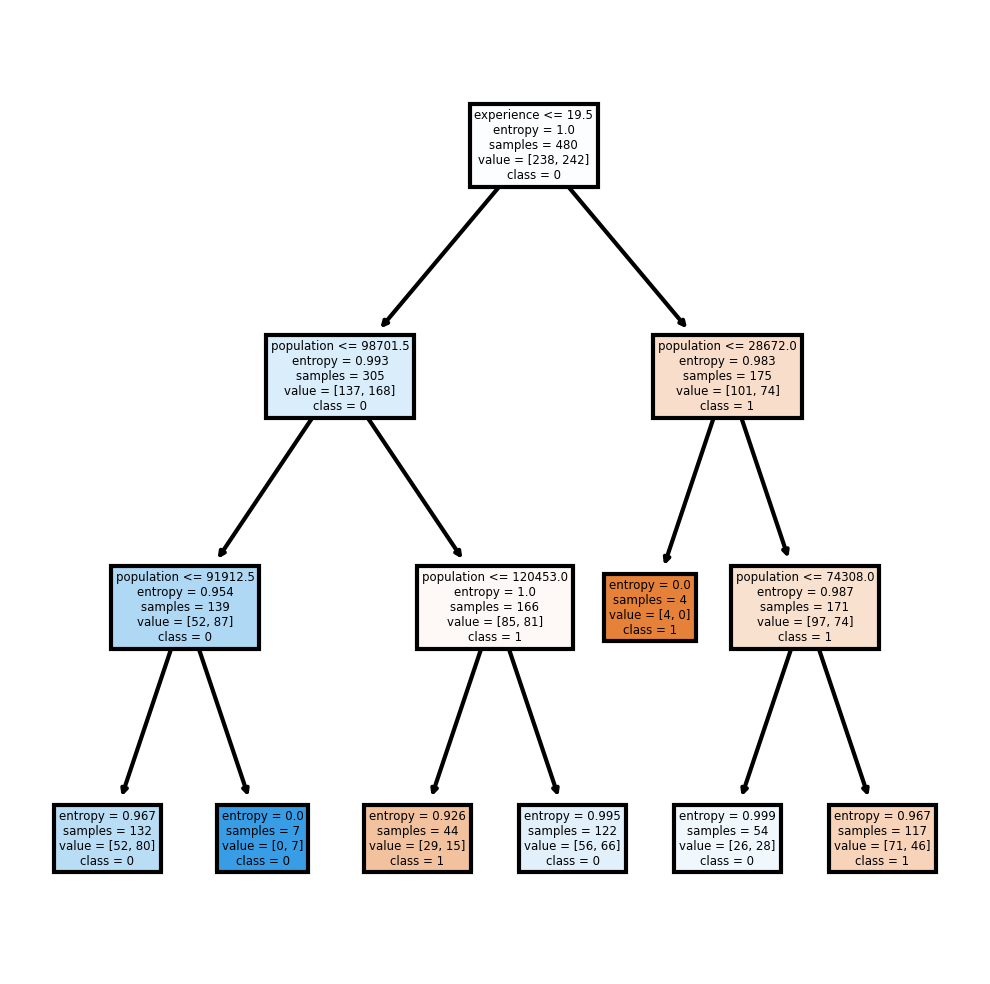

In [33]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);
preds = model.predict(x_test)
pd.Series(preds).value_counts()

In [34]:
preds
pd.crosstab(y_test,preds)

col_0,0,1
Urban_YES,,
0,24,36
1,16,44


In [35]:
np.mean(preds==y_test)

0.5666666666666667

In [36]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [37]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [38]:
model.score(X_test,y_test)

-0.9110759493670895

# Question.2

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [ ]:
# load dataset
df=pd.read_csv('/content/Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
df.shape

(400, 11)

In [ ]:
# checking name of the columns
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [ ]:
#finding null values
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
# for duplicate entries in dataset
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
# Lets check distribution of every column with help of describe fuction and boxplot
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


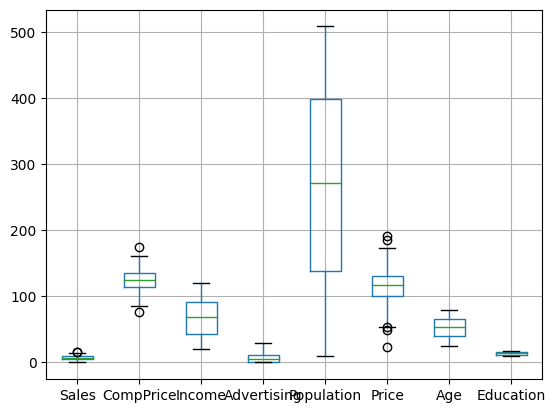

In [ ]:
df.boxplot()
plt.show();

<ipython-input-72-e94c83bafcb1>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df, x='ShelveLoc',y='Sales',ci=False)    #ci=for eliminating ERROR BAR


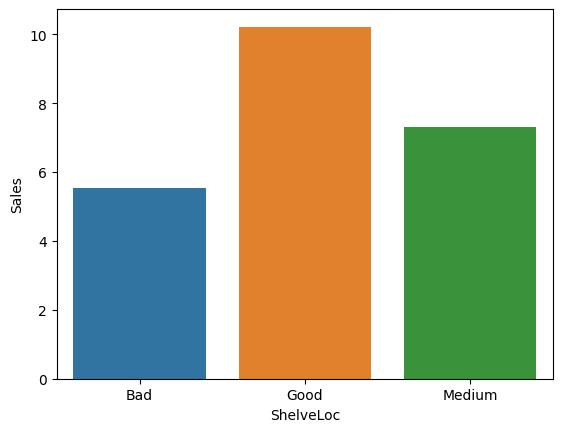

In [ ]:
sns.barplot(data=df, x='ShelveLoc',y='Sales',ci=False)    #ci=for eliminating ERROR BAR
plt.show();

<ipython-input-76-51766b639ad6>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df, x='Urban',y='Sales',ci=False)


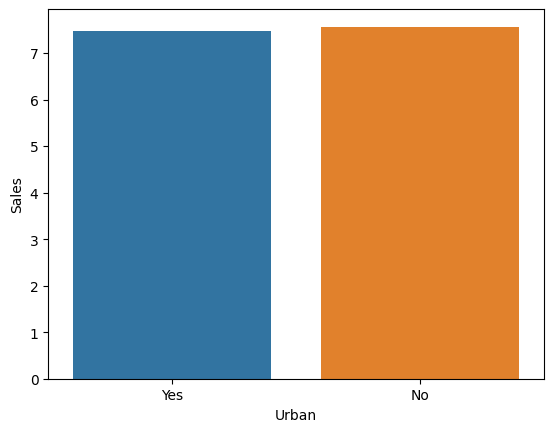

In [ ]:
sns.barplot(data=df, x='Urban',y='Sales',ci=False)
plt.show();

<ipython-input-77-61c1dd37b336>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df, x='US',y='Sales',ci=False)


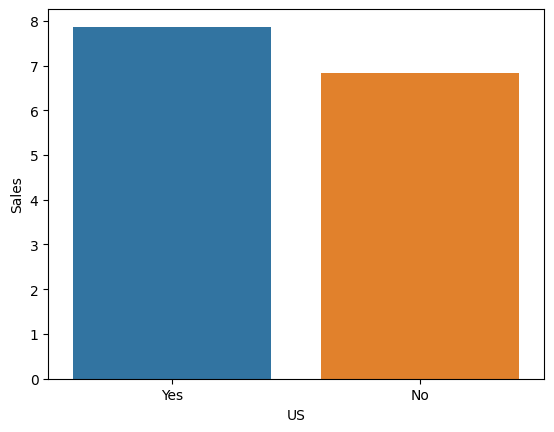

In [ ]:
sns.barplot(data=df, x='US',y='Sales',ci=False)
plt.show();

In [ ]:
df.skew()

<ipython-input-78-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64

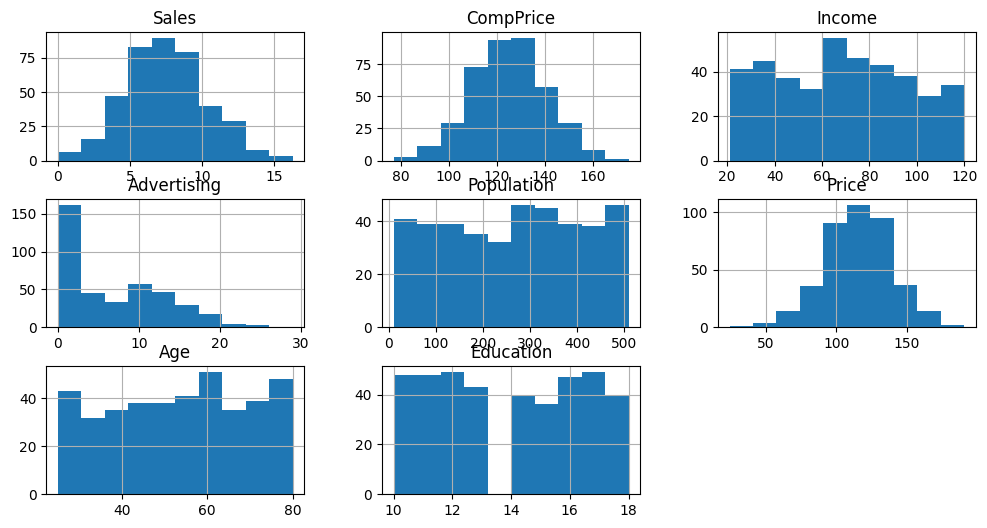

In [ ]:
df.hist(figsize=(12,6))
plt.show();

<ipython-input-80-af34321ba8f9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Sales)


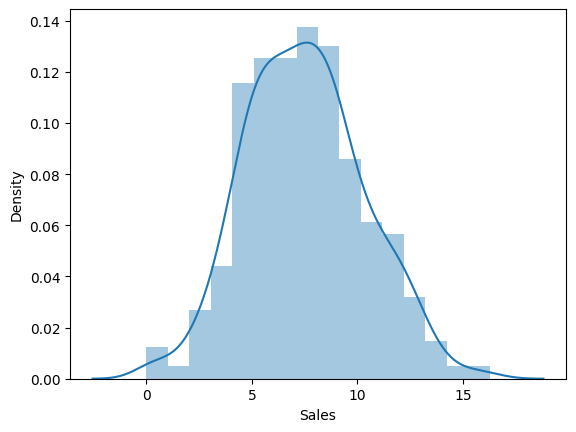

In [ ]:
sns.distplot(df.Sales)
plt.show();

<ipython-input-81-5a97f93a0c59>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Advertising)


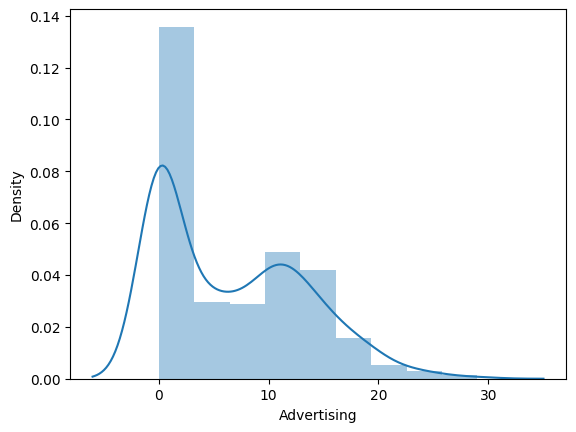

In [ ]:
sns.distplot(df.Advertising)
plt.show();

In [ ]:
df['Advertising']=np.sqrt(df['Advertising'])

<ipython-input-83-5a97f93a0c59>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Advertising)


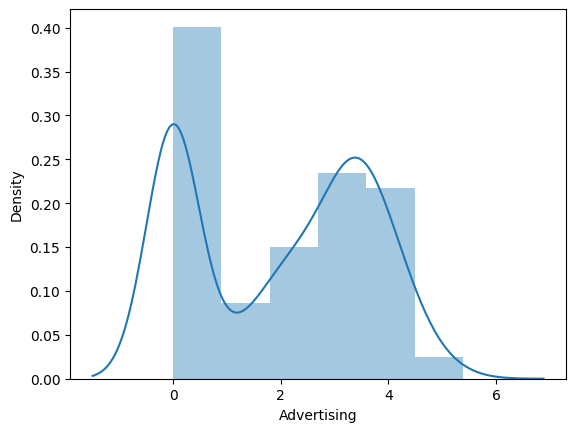

In [ ]:
sns.distplot(df.Advertising)
plt.show();

<ipython-input-84-02610835088f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Price)


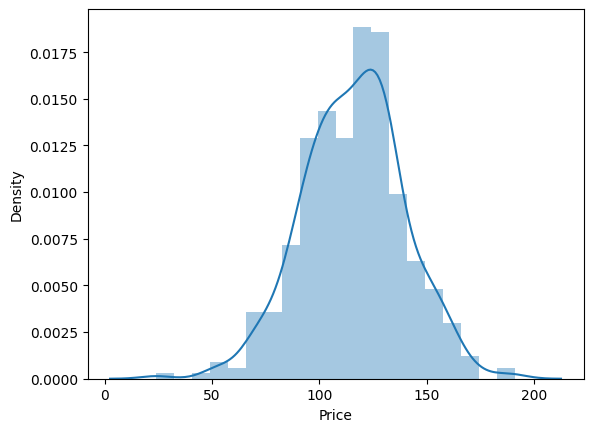

In [ ]:
sns.distplot(df.Price)
plt.show();

In [ ]:
df.skew()

<ipython-input-85-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising   -0.056664
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    float64
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 34.5+ KB


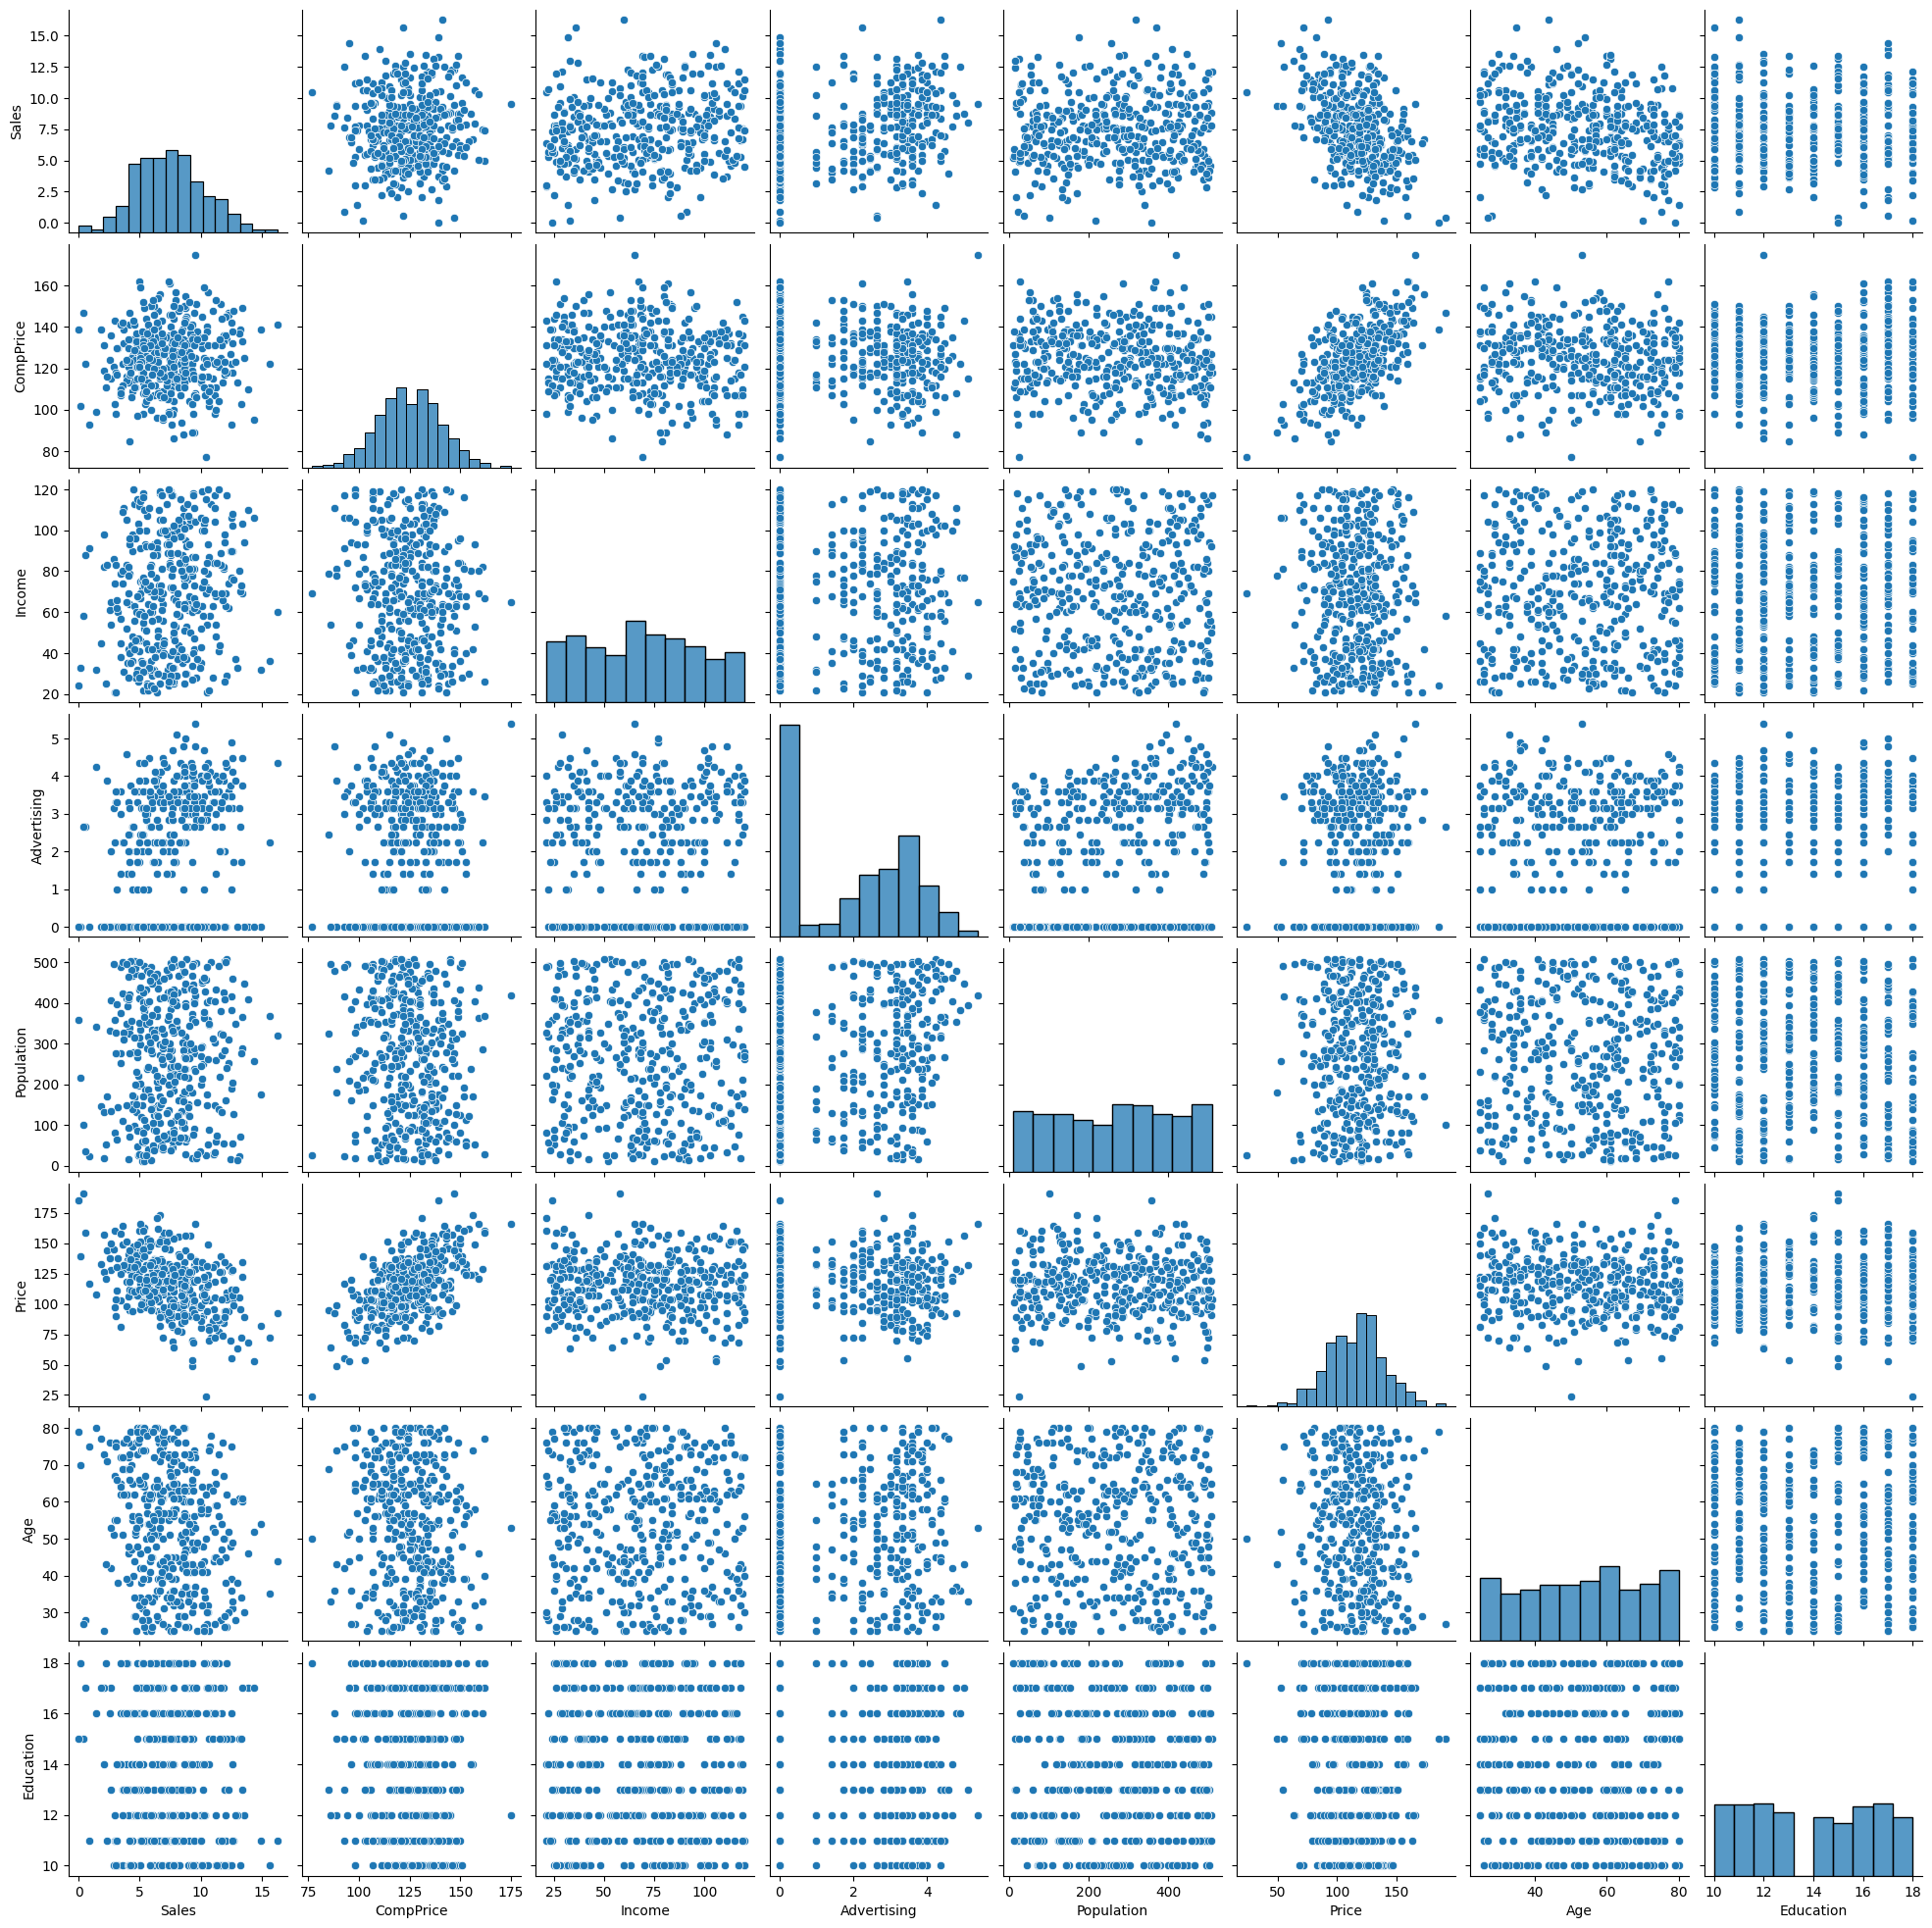

In [ ]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df)
plt.show();

In [ ]:
df.corr()

<ipython-input-88-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.250264,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.017249,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.054728,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.250264,-0.017249,0.054728,1.000000,0.239937,0.052056,-0.000916,-0.053981
Population,0.050471,-0.094707,-0.007877,0.239937,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.052056,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.000916,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.053981,-0.106378,0.011747,0.006488,1.000000


In [ ]:
# converting continueous target feature into category

In [ ]:
df['Sales'].max(axis=0)

16.27

In [ ]:
df['Sales']=pd.cut(x=df['Sales'],bins=[0,6,11,16.27],labels=['Low','Medium','High'])
df.head(400)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,3.316625,276,120,Bad,42,17,Yes,Yes
1,High,111,48,4.000000,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,3.162278,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,2.000000,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,1.732051,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,4.123106,203,128,Good,33,14,Yes,Yes
396,Medium,139,23,1.732051,37,120,Medium,55,11,No,Yes
397,Medium,162,26,3.464102,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,2.645751,284,95,Bad,50,12,Yes,Yes


In [ ]:
df.Sales.unique()

['Medium', 'High', 'Low', NaN]
Categories (3, object): ['Low' < 'Medium' < 'High']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        399 non-null    category
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    float64 
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
dtypes: category(1), float64(1), int64(6), object(3)
memory usage: 31.9+ KB


In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        399 non-null    category
 1   CompPrice    399 non-null    int64   
 2   Income       399 non-null    int64   
 3   Advertising  399 non-null    float64 
 4   Population   399 non-null    int64   
 5   Price        399 non-null    int64   
 6   ShelveLoc    399 non-null    object  
 7   Age          399 non-null    int64   
 8   Education    399 non-null    int64   
 9   Urban        399 non-null    object  
 10  US           399 non-null    object  
dtypes: category(1), float64(1), int64(6), object(3)
memory usage: 34.8+ KB


In [ ]:
df['Sales'].value_counts()   # having imbalanced data in target column

Medium    221
Low       129
High       49
Name: Sales, dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Urban']=label_encoder.fit_transform(df['Urban'])
df['US']=label_encoder.fit_transform(df['US'])
df['Sales']=label_encoder.fit_transform(df['Sales'])
df

<ipython-input-98-aa564ec66c3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Urban']=label_encoder.fit_transform(df['Urban'])
<ipython-input-98-aa564ec66c3b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['US']=label_encoder.fit_transform(df['US'])
<ipython-input-98-aa564ec66c3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,3.316625,276,120,Bad,42,17,1,1
1,0,111,48,4.000000,260,83,Good,65,10,1,1
2,2,113,35,3.162278,269,80,Medium,59,12,1,1
3,2,117,100,2.000000,466,97,Medium,55,14,1,1
4,1,141,64,1.732051,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,4.123106,203,128,Good,33,14,1,1
396,2,139,23,1.732051,37,120,Medium,55,11,0,1
397,2,162,26,3.464102,368,159,Medium,40,18,1,1
398,1,100,79,2.645751,284,95,Bad,50,12,1,1


In [ ]:
df.US.unique()

array([1, 0])

In [ ]:
df.Urban.unique()

array([1, 0])

In [ ]:
df1=pd.get_dummies(df['ShelveLoc'])
df1

,Bad,Good,Medium
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
395,0,1,0
396,0,0,1
397,0,0,1
398,1,0,0


In [ ]:
df=pd.concat([df,df1],axis=1)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Bad,Good,Medium
0,2,138,73,3.316625,276,120,Bad,42,17,1,1,1,0,0
1,0,111,48,4.000000,260,83,Good,65,10,1,1,0,1,0
2,2,113,35,3.162278,269,80,Medium,59,12,1,1,0,0,1
3,2,117,100,2.000000,466,97,Medium,55,14,1,1,0,0,1
4,1,141,64,1.732051,340,128,Bad,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,4.123106,203,128,Good,33,14,1,1,0,1,0
396,2,139,23,1.732051,37,120,Medium,55,11,0,1,0,0,1
397,2,162,26,3.464102,368,159,Medium,40,18,1,1,0,0,1
398,1,100,79,2.645751,284,95,Bad,50,12,1,1,1,0,0


In [ ]:
df=df.drop(['ShelveLoc'],axis=1)
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Bad,Good,Medium
0,2,138,73,3.316625,276,120,42,17,1,1,1,0,0
1,0,111,48,4.000000,260,83,65,10,1,1,0,1,0
2,2,113,35,3.162278,269,80,59,12,1,1,0,0,1
3,2,117,100,2.000000,466,97,55,14,1,1,0,0,1
4,1,141,64,1.732051,340,128,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,4.123106,203,128,33,14,1,1,0,1,0
396,2,139,23,1.732051,37,120,55,11,0,1,0,0,1
397,2,162,26,3.464102,368,159,40,18,1,1,0,0,1
398,1,100,79,2.645751,284,95,50,12,1,1,1,0,0


In [ ]:
# divinding data into feature and target
y=df['Sales']
X=df.iloc[:,1:]

In [ ]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Bad,Good,Medium
0,138,73,3.316625,276,120,42,17,1,1,1,0,0
1,111,48,4.000000,260,83,65,10,1,1,0,1,0
2,113,35,3.162278,269,80,59,12,1,1,0,0,1
3,117,100,2.000000,466,97,55,14,1,1,0,0,1
4,141,64,1.732051,340,128,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,4.123106,203,128,33,14,1,1,0,1,0
396,139,23,1.732051,37,120,55,11,0,1,0,0,1
397,162,26,3.464102,368,159,40,18,1,1,0,0,1
398,100,79,2.645751,284,95,50,12,1,1,1,0,0


In [ ]:
y

0      2
1      0
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: Sales, Length: 399, dtype: int64

In [ ]:
# data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.676789  ,  1.82776943,  0.24643857, ..., -0.58424837,
        -0.55664994,  0.9822366 ],
       [-0.16128328, -1.15732519,  0.68088174, ...,  1.71160085,
        -0.55664994, -1.01808465],
       [ 2.03059805,  0.89267955, -1.24652177, ..., -0.58424837,
         1.79646117, -1.01808465],
       ...,
       [ 0.676789  ,  0.4610996 ,  1.1140558 , ..., -0.58424837,
         1.79646117, -1.01808465],
       [ 0.35445351,  1.86373442,  1.1140558 , ..., -0.58424837,
        -0.55664994,  0.9822366 ],
       [-0.87042135, -1.0853952 ,  1.26650496, ..., -0.58424837,
        -0.55664994,  0.9822366 ]])

In [ ]:
X_test

array([[-0.09681618,  0.56899459, -1.24652177, ..., -0.58424837,
        -0.55664994,  0.9822366 ],
       [-1.90189492,  0.92864454,  1.03401282, ..., -0.58424837,
        -0.55664994,  0.9822366 ],
       [-0.48361877,  0.10144965,  0.86484299, ..., -0.58424837,
        -0.55664994,  0.9822366 ],
       ...,
       [-0.67702006, -1.66083513, -1.24652177, ..., -0.58424837,
        -0.55664994,  0.9822366 ],
       [ 0.09658511, -0.83364023,  1.41022063, ..., -0.58424837,
        -0.55664994,  0.9822366 ],
       [-0.41915167, -0.04241034,  1.26650496, ..., -0.58424837,
        -0.55664994,  0.9822366 ]])

In [ ]:
y_train.value_counts()

2    155
1     88
0     36
Name: Sales, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_res,y_res=sm.fit_resample(X_train,y_train)

In [ ]:
y_res.value_counts()

2    155
1    155
0    155
Name: Sales, dtype: int64

In [ ]:
X_res

array([[ 0.676789  ,  1.82776943,  0.24643857, ..., -0.58424837,
        -0.55664994,  0.9822366 ],
       [-0.16128328, -1.15732519,  0.68088174, ...,  1.71160085,
        -0.55664994, -1.01808465],
       [ 2.03059805,  0.89267955, -1.24652177, ..., -0.58424837,
         1.79646117, -1.01808465],
       ...,
       [ 1.42869049,  0.30133501, -1.24652177, ..., -0.58424837,
        -0.55664994,  0.9822366 ],
       [ 0.57403634, -0.6381081 , -0.43333601, ..., -0.58424837,
        -0.55664994,  0.9822366 ],
       [ 0.07632679,  1.0601729 , -1.24652177, ...,  1.71160085,
        -0.55664994, -1.01808465]])

In [ ]:
X_res.shape

(465, 12)

In [ ]:
y_res

0      2
1      1
2      2
3      1
4      2
      ..
460    1
461    1
462    1
463    1
464    1
Name: Sales, Length: 465, dtype: int64

In [ ]:
y_res.shape

(465,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth= 6)
model.fit(X_res, y_res)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

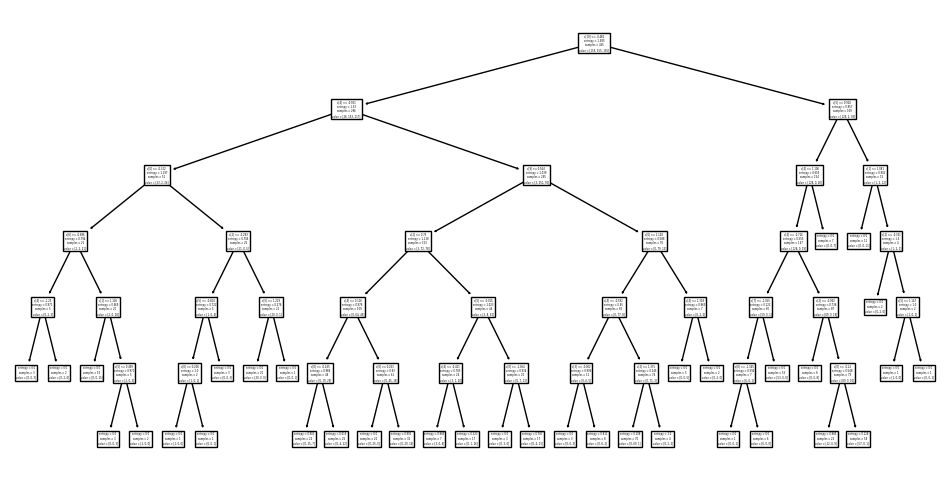

In [ ]:
# Plotting Decision tree
plt.figure(figsize=(12,6))
from sklearn import tree
tree.plot_tree(model);
plt.show();

In [ ]:
y_pred = model.predict(X_test)

y_pred

array([2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 0, 0, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2,
       2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 0, 1, 1, 0, 2, 0, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 2, 1, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 2])

In [ ]:
pd.Series(y_pred).value_counts()

2    52
1    52
0    16
dtype: int64

In [ ]:
#confusion matrix for checking misclassification during decision tree
pd.crosstab(y_test,y_pred)

col_0,0,1,2
Sales,,,
0,7,0,6
1,0,32,9
2,9,20,37


In [ ]:
#above matrix shows that thier are some misclassifications

In [ ]:
from sklearn.metrics import accuracy_score
model.score(X_res,y_res)

0.8924731182795699

In [ ]:
model.score(X_test, y_test)

0.6333333333333333

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(X_res, y_res)

DecisionTreeClassifier(max_depth=3)

In [ ]:
model_gini.score(X_res, y_res)

0.7462365591397849

In [ ]:
#Prediction and computing the accuracy
pred=model_gini.predict(X_test)
np.mean(y_pred==y_test)

0.6333333333333333